<a href="https://colab.research.google.com/github/natanascimento/image-processing/blob/task%2Ffiltering-exercise/Exerc%C3%ADcio_Filtragem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [131]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [132]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
from scipy import ndimage

In [133]:
mickey_minnie = "/content/drive/MyDrive/UNIT/F113298 - Processamento de Imagens de Computação Gráfica - N01/mickeyMinnie.png"
messi = "/content/drive/MyDrive/UNIT/F113298 - Processamento de Imagens de Computação Gráfica - N01/messi.jpg"

In [134]:
def show_image(image):
    return cv2_imshow(image)

# Questão 1

## Correlação

In [135]:
image = cv2.imread(mickey_minnie, 0)

In [136]:
def correlation(img, img_corr, mascara):
  img_correlacao = np.zeros(np.array(img.shape) + np.array(mascara.shape) - 1)
  for x in range(mascara.shape[0]):
    for y in range(mascara.shape[1]):
      img_correlacao[x:x + img.shape[0], y:y + img.shape[1]] += img*mascara[x,y]
      return img_correlacao.astype("uint8")

In [137]:
mascara = np.ones((3,3), dtype="int")

In [138]:
image_corr = correlation(image, image, mascara)

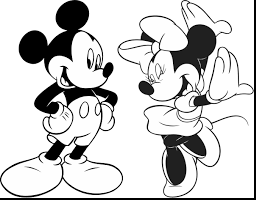

In [139]:
show_image(image_corr)

## Convolução

In [140]:
class Convolution:

  @staticmethod
  def __rotate_180(image):
    size_image = image.shape
    lines = size_image[0]
    columns = size_image[1]

    new_image = np.zeros((lines, columns))

    for line in range(0, lines):
      for column in range(0, columns):
        new_image[((lines-1) - line), ((columns-1) - column)] = image[line, column]
    return new_image

  @staticmethod
  def __get_slice(point, size, image):
    delta = int(size/2)
    a = (point[0] - delta)
    b = (point[1] - delta)
    return image[a:(a+size), b:(b+size)]

  @staticmethod
  def set(image, mask):
    size_image = image.shape
    lines = size_image[0]
    columns = size_image[1]

    size_mascara = mask.shape
    lines_mask = size_mascara[0]
    columns_mask = size_mascara[1]

    new_image = np.zeros(size_image)

    delta = int(lines_mask/2)

    for line in range(0+delta, lines-delta):
      for column in range(0+delta, columns-delta):
        slice_image = Convolution.__get_slice((line, column), lines_mask, image)
        mask_180 = Convolution.__rotate_180(mask)
        new_line_column = np.sum(slice_image * mask_180)
        new_image[line, column] = new_line_column
    return new_image

In [141]:
mask = np.array([ [-1,0,1], [-2,1,2], [-1,0,1]])

In [142]:
image_cov = Convolution().set(image, mask)

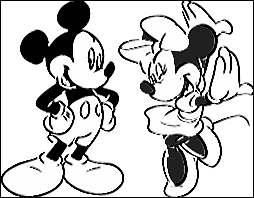

In [143]:
show_image(image_cov)

# Questão 2

In [144]:
image = cv2.imread(mickey_minnie)

In [145]:
# Set figure size
figure_size = 9

## Passa baixa: Média

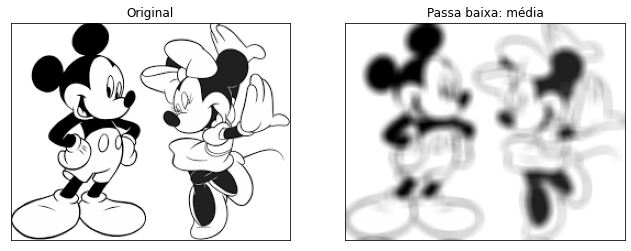

In [146]:
new_image = cv2.blur(image, (figure_size, figure_size))

plt.figure(figsize = (11, 6))
plt.subplot(121)
plt.imshow(image)
plt.title("Original")

plt.xticks([])
plt.yticks([])
plt.subplot(122)
plt.imshow(new_image)
plt.xticks([])
plt.yticks([])
plt.title("Passa baixa: média")
plt.show()

## Passa baixa: Mediana

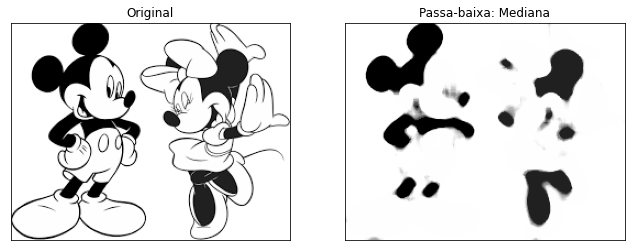

In [147]:
median = cv2.medianBlur(image, figure_size)

plt.figure(figsize = (11,6))
plt.subplot(121)
plt.imshow(image)
plt.title("Original")
plt.xticks([])
plt.yticks([])

plt.subplot(122)
plt.imshow(median)
plt.title("Passa-baixa: Mediana")
plt.xticks([])
plt.yticks([])

plt.show()

## Passa Alta: Prewitt

In [148]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [149]:
def set_prewitt(image, kernel_x, kernel_y): 
  prewittx = cv2.filter2D(image, -1, kernel_x)
  prewitty = cv2.filter2D(image, -1, kernel_y)
  return prewittx, prewitty

In [150]:
gaussian = cv2.GaussianBlur(gray,(3,3),0)

kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])

In [151]:
img_prewittx, img_prewitty = set_prewitt(gaussian, kernelx, kernely)

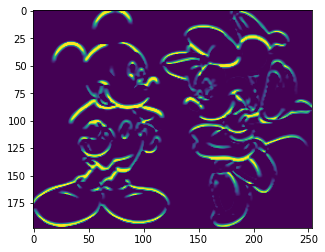

In [152]:
plt.imshow(img_prewittx)

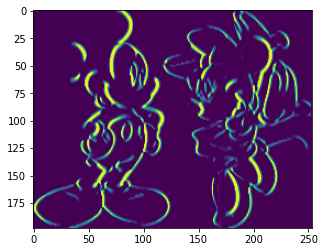

In [153]:
plt.imshow(img_prewitty)

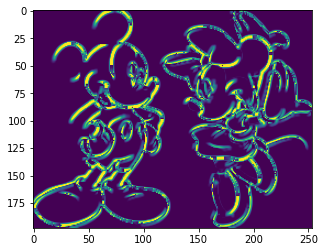

In [154]:
plt.imshow(img_prewittx + img_prewitty)

## Roberts

In [155]:
image = cv2.imread(messi ,0).astype('float64')

In [156]:
roberts_cross_v = np.array([[1,0],[0,-1]])
roberts_cross_h = np.array([[0,1],[-1,0]])

image/=255.0

vertical = ndimage.convolve(image, roberts_cross_v )
horizontal = ndimage.convolve(image, roberts_cross_h )

img_roberts = np.sqrt( np.square(horizontal) + np.square(vertical))

img_roberts*=255

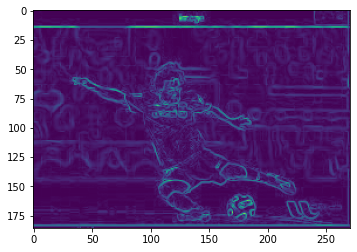

In [157]:
plt.imshow(img_roberts)